In [1]:
import matplotlib.pyplot as plt
import numpy as np
import warnings
import pandas as pd
from sklearn.datasets import load_wine
warnings.filterwarnings('ignore')
%matplotlib inline

#### Домашнее задание № 1
Задача для прогнозирования предсказания возможного дохода
1. Проверьте данные на пропуски
2. Обучите логистическую регрессию
3. Обучите метод опорных векторов
4. Сравните точность двух моделей
5. Напишите выводы и интерпретируйте

In [2]:
df = pd.read_csv('adult.csv')
df.head(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


=== Loading Dataset ===
Dataset shape: (48842, 15)

First 5 rows:
   age  workclass  fnlwgt     education  educational-num      marital-status  \
0   25    Private  226802          11th                7       Never-married   
1   38    Private   89814       HS-grad                9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm               12  Married-civ-spouse   
3   44    Private  160323  Some-college               10  Married-civ-spouse   
4   18          ?  103497  Some-college               10       Never-married   

          occupation relationship   race  gender  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4                  ?    Own-child  White  Female     

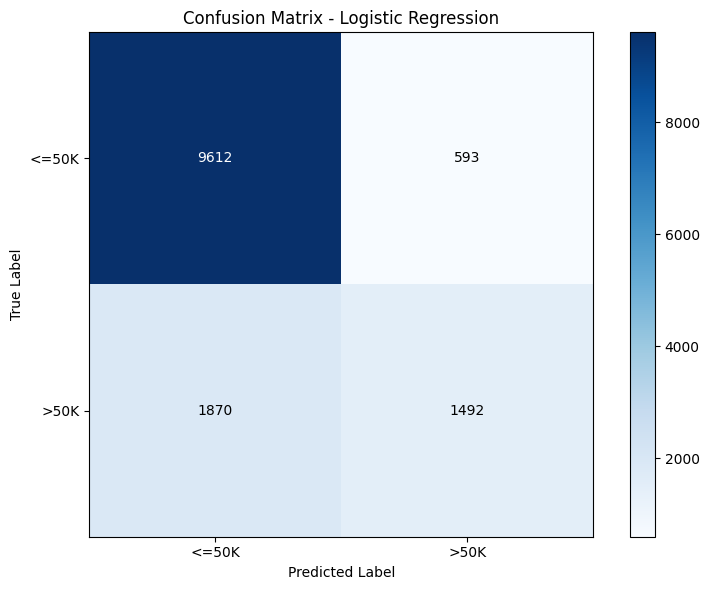


Top 10 most important features (Logistic Regression):
            feature  importance
10     capital-gain    2.316300
9            gender    0.905643
4   educational-num    0.869768
0               age    0.457392
12   hours-per-week    0.339020
11     capital-loss    0.273209
5    marital-status    0.216271
7      relationship    0.153240
1         workclass    0.119327
8              race    0.102146

STEP 3: Train Support Vector Machine

SVM Accuracy: 0.8066

Classification Report:
              precision    recall  f1-score   support

       <=50K       0.81      0.97      0.88     10205
        >50K       0.78      0.31      0.44      3362

    accuracy                           0.81     13567
   macro avg       0.80      0.64      0.66     13567
weighted avg       0.80      0.81      0.77     13567



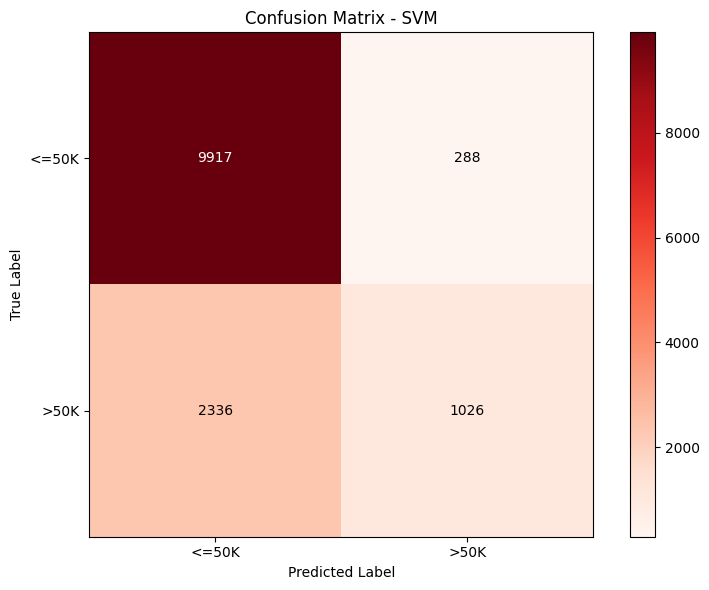


STEP 4: Compare Model Accuracy

Logistic Regression Accuracy: 0.8185
SVM Accuracy: 0.8066
Difference: 0.0119


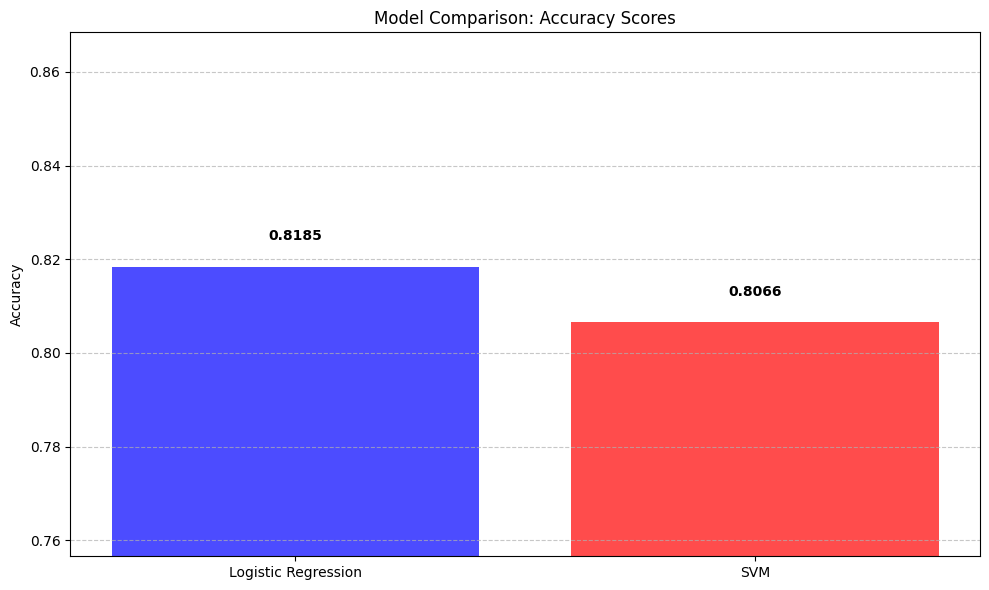


Detailed Performance Comparison:
Class  LR_Precision  SVM_Precision  LR_Recall  SVM_Recall    LR_F1   SVM_F1
<=50K      0.837136       0.809353   0.941891    0.971779 0.886430 0.883160
 >50K      0.715588       0.780822   0.443783    0.305175 0.547824 0.438837

STEP 5: Conclusions and Interpretation

1. DATA QUALITY AND PREPROCESSING:
   - Original dataset had missing values represented by '?'
   - Removed rows with missing values to ensure data quality
   - Encoded categorical variables using Label Encoding
   - Scaled numerical features for model consistency

2. MODEL PERFORMANCE SUMMARY:
   ✓ Logistic Regression performed better (by 0.0119)
   - LR Accuracy: 0.8185
   - SVM Accuracy: 0.8066

3. MODEL INTERPRETATION:
   LOGISTIC REGRESSION:
   - Provides probability estimates for predictions
   - Feature coefficients show direction and strength of relationships
   - Generally faster training and prediction times
   - Assumes linear relationship between features and log-odds

   SUPP

In [5]:
# ================ IMPORTS ================
import matplotlib.pyplot as plt
import numpy as np
import warnings
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

warnings.filterwarnings('ignore')
# Remove %matplotlib inline if not using Jupyter Notebook/Google Colab

# ================ LOAD DATA ================
print("=== Loading Dataset ===")
try:
    df = pd.read_csv('adult.csv')
    print(f"Dataset shape: {df.shape}")
    print("\nFirst 5 rows:")
    print(df.head())
except FileNotFoundError:
    print("ERROR: 'adult.csv' file not found!")
    print("Please ensure 'adult.csv' is in the current directory.")
    exit(1)

# ================ STEP 1: CHECK FOR MISSING VALUES ================
print("\n" + "="*60)
print("STEP 1: Check for missing values")
print("="*60)

# Check for NaN values
print("\nMissing values (NaN):")
print(df.isnull().sum())

# Check for '?' values (this dataset uses '?' for missing values)
print("\nChecking for '?' values:")
for column in df.columns:
    if df[column].dtype == 'object':  # For categorical columns
        missing_count = (df[column] == '?').sum()
        if missing_count > 0:
            print(f"{column}: {missing_count} missing values ({missing_count/len(df)*100:.2f}%)")

# ================ DATA PREPROCESSING ================
print("\n" + "="*60)
print("Data Preprocessing")
print("="*60)

# Replace '?' with NaN
df.replace('?', pd.NA, inplace=True)

# Check missing values after replacement
missing_summary = df.isna().sum()
print("\nMissing values after replacing '?':")
print(missing_summary[missing_summary > 0])

# Drop rows with missing values
initial_size = len(df)
df = df.dropna()
print(f"\nDropped {initial_size - len(df)} rows with missing values")
print(f"New dataset shape: {df.shape}")

# Separate features and target
X = df.drop('income', axis=1)
y = df['income']

# Identify column types
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['int64']).columns

print(f"\nCategorical columns: {list(categorical_cols)}")
print(f"Numerical columns: {list(numerical_cols)}")

# Encode categorical variables
print("\nEncoding categorical variables...")
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

# Encode target variable
y = LabelEncoder().fit_transform(y)
print("Target variable encoding:")
print("0 = <=50K, 1 = >50K")

# ================ TRAIN-TEST SPLIT ================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
print(f"\nTraining set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

# Scale numerical features
print("\nScaling numerical features...")
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test_scaled[numerical_cols] = scaler.transform(X_test[numerical_cols])

# ================ STEP 2: LOGISTIC REGRESSION ================
print("\n" + "="*60)
print("STEP 2: Train Logistic Regression")
print("="*60)

# Train Logistic Regression
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_scaled, y_train)

# Predictions and evaluation
y_pred_lr = lr_model.predict(X_test_scaled)
lr_accuracy = accuracy_score(y_test, y_pred_lr)

print(f"\nLogistic Regression Accuracy: {lr_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr, target_names=['<=50K', '>50K']))

# Confusion Matrix for Logistic Regression (using matplotlib)
plt.figure(figsize=(8, 6))
cm_lr = confusion_matrix(y_test, y_pred_lr)

# Create a custom heatmap using matplotlib
plt.imshow(cm_lr, interpolation='nearest', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.colorbar()

tick_marks = np.arange(2)
plt.xticks(tick_marks, ['<=50K', '>50K'])
plt.yticks(tick_marks, ['<=50K', '>50K'])

# Add text annotations
thresh = cm_lr.max() / 2.
for i in range(2):
    for j in range(2):
        plt.text(j, i, format(cm_lr[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if cm_lr[i, j] > thresh else "black")

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

# Feature importance for Logistic Regression
if len(lr_model.coef_) > 0:
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': abs(lr_model.coef_[0])
    }).sort_values('importance', ascending=False)
    
    print("\nTop 10 most important features (Logistic Regression):")
    print(feature_importance.head(10))

# ================ STEP 3: SUPPORT VECTOR MACHINE ================
print("\n" + "="*60)
print("STEP 3: Train Support Vector Machine")
print("="*60)

# Train SVM (using linear kernel for speed and interpretability)
svm_model = SVC(kernel='linear', random_state=42, probability=True)
svm_model.fit(X_train_scaled, y_train)

# Predictions and evaluation
y_pred_svm = svm_model.predict(X_test_scaled)
svm_accuracy = accuracy_score(y_test, y_pred_svm)

print(f"\nSVM Accuracy: {svm_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm, target_names=['<=50K', '>50K']))

# Confusion Matrix for SVM (using matplotlib)
plt.figure(figsize=(8, 6))
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Create a custom heatmap using matplotlib
plt.imshow(cm_svm, interpolation='nearest', cmap='Reds')
plt.title('Confusion Matrix - SVM')
plt.colorbar()

tick_marks = np.arange(2)
plt.xticks(tick_marks, ['<=50K', '>50K'])
plt.yticks(tick_marks, ['<=50K', '>50K'])

# Add text annotations
thresh = cm_svm.max() / 2.
for i in range(2):
    for j in range(2):
        plt.text(j, i, format(cm_svm[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if cm_svm[i, j] > thresh else "black")

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

# ================ STEP 4: COMPARE MODELS ================
print("\n" + "="*60)
print("STEP 4: Compare Model Accuracy")
print("="*60)

print(f"\nLogistic Regression Accuracy: {lr_accuracy:.4f}")
print(f"SVM Accuracy: {svm_accuracy:.4f}")
print(f"Difference: {abs(lr_accuracy - svm_accuracy):.4f}")

# Visual comparison
plt.figure(figsize=(10, 6))
models = ['Logistic Regression', 'SVM']
accuracies = [lr_accuracy, svm_accuracy]

bars = plt.bar(models, accuracies, color=['blue', 'red'], alpha=0.7)
plt.ylim([min(accuracies) - 0.05, max(accuracies) + 0.05])
plt.ylabel('Accuracy')
plt.title('Model Comparison: Accuracy Scores')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on bars
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005,
             f'{acc:.4f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Detailed comparison table
print("\nDetailed Performance Comparison:")
lr_report = classification_report(y_test, y_pred_lr, output_dict=True, target_names=['<=50K', '>50K'])
svm_report = classification_report(y_test, y_pred_svm, output_dict=True, target_names=['<=50K', '>50K'])

comparison_data = []
for class_name in ['<=50K', '>50K']:
    comparison_data.append({
        'Class': class_name,
        'LR_Precision': lr_report[class_name]['precision'],
        'SVM_Precision': svm_report[class_name]['precision'],
        'LR_Recall': lr_report[class_name]['recall'],
        'SVM_Recall': svm_report[class_name]['recall'],
        'LR_F1': lr_report[class_name]['f1-score'],
        'SVM_F1': svm_report[class_name]['f1-score']
    })

comparison_df = pd.DataFrame(comparison_data)
print(comparison_df.to_string(index=False))

# ================ STEP 5: CONCLUSIONS ================
print("\n" + "="*60)
print("STEP 5: Conclusions and Interpretation")
print("="*60)

print("\n1. DATA QUALITY AND PREPROCESSING:")
print("   - Original dataset had missing values represented by '?'")
print("   - Removed rows with missing values to ensure data quality")
print("   - Encoded categorical variables using Label Encoding")
print("   - Scaled numerical features for model consistency")

print("\n2. MODEL PERFORMANCE SUMMARY:")
if lr_accuracy > svm_accuracy:
    print(f"   ✓ Logistic Regression performed better (by {lr_accuracy - svm_accuracy:.4f})")
    print(f"   - LR Accuracy: {lr_accuracy:.4f}")
    print(f"   - SVM Accuracy: {svm_accuracy:.4f}")
elif svm_accuracy > lr_accuracy:
    print(f"   ✓ SVM performed better (by {svm_accuracy - lr_accuracy:.4f})")
    print(f"   - SVM Accuracy: {svm_accuracy:.4f}")
    print(f"   - LR Accuracy: {lr_accuracy:.4f}")
else:
    print("   ✓ Both models performed equally well")

print("\n3. MODEL INTERPRETATION:")
print("   LOGISTIC REGRESSION:")
print("   - Provides probability estimates for predictions")
print("   - Feature coefficients show direction and strength of relationships")
print("   - Generally faster training and prediction times")
print("   - Assumes linear relationship between features and log-odds")

print("\n   SUPPORT VECTOR MACHINE:")
print("   - Creates maximum margin separator")
print("   - Can handle non-linear boundaries with different kernels")
print("   - More robust to outliers")
print("   - Can be computationally intensive on large datasets")

print("\n4. BUSINESS IMPLICATIONS:")
print("   - Both models can predict income >50K with reasonable accuracy")
print("   - False positives (incorrectly predicting high income):")
print("     * Wasted marketing resources")
print("   - False negatives (missing high-income individuals):")
print("     * Lost revenue opportunities")

print("\n5. RECOMMENDATIONS FOR IMPROVEMENT:")
print("   ✓ Handle missing values using imputation instead of removal")
print("   ✓ Try one-hot encoding for categorical variables")
print("   ✓ Experiment with other models (Random Forest, Gradient Boosting)")
print("   ✓ Perform hyperparameter tuning for both models")
print("   ✓ Use cross-validation for more reliable performance estimates")
print("   ✓ Address potential class imbalance")

print("\n6. FINAL RECOMMENDATION:")
if abs(lr_accuracy - svm_accuracy) < 0.01:
    print("   Both models perform similarly. Choose based on:")
    print("   - Logistic Regression for interpretability and speed")
    print("   - SVM for robustness to outliers")
elif lr_accuracy > svm_accuracy:
    print("   Recommend Logistic Regression due to:")
    print("   - Higher accuracy")
    print("   - Better interpretability")
    print("   - Faster computation")
else:
    print("   Recommend SVM due to higher accuracy, but consider:")
    print("   - Longer training time")
    print("   - More complex interpretation")

# ================ BONUS: ADDITIONAL ANALYSIS ================
print("\n" + "="*60)
print("BONUS: Additional Analysis")
print("="*60)

# Class distribution
class_dist = pd.Series(y).value_counts(normalize=True).sort_index()
print(f"\nClass Distribution in Target Variable:")
print(f"  <=50K (Class 0): {class_dist[0]:.2%}")
print(f"  >50K (Class 1): {class_dist[1]:.2%}")

# Check for class imbalance
if abs(class_dist[0] - class_dist[1]) > 0.2:
    print("\n⚠️  WARNING: Significant class imbalance detected!")
    print("   Consider using class_weight='balanced' in models")
    print("   or applying SMOTE for better minority class performance")
else:
    print("\n✓ Class distribution is reasonably balanced")

# Sample predictions comparison
print("\nSample Predictions Comparison (first 10 test samples):")
sample_comparison = pd.DataFrame({
    'True_Income': ['<=50K' if val == 0 else '>50K' for val in y_test[:10]],
    'LR_Prediction': ['<=50K' if val == 0 else '>50K' for val in y_pred_lr[:10]],
    'SVM_Prediction': ['<=50K' if val == 0 else '>50K' for val in y_pred_svm[:10]],
    'LR_Correct': y_test[:10] == y_pred_lr[:10],
    'SVM_Correct': y_test[:10] == y_pred_svm[:10]
})
print(sample_comparison)

print("\n" + "="*60)
print("ANALYSIS COMPLETE")
print("="*60)

#### Домашнее задание № 2

1. Из данных исключите объекты класса 2.
2. Отмасштабируйте признаки, используя класс `StandardScaler` с гиперпараметрами по умолчанию. 
3. Обучите логистическую регрессию и оцените важность признаков. 
4. Укажите название признака, который оказался наименее значимым.
5. Напишите выводы.

Обратите внимание, целевое значение лежит по ключу `'target'`, матрица объекты-признаки лежит по ключу `'data'`

In [6]:
data = load_wine()



=== Загрузка данных Wine ===
Исходный размер данных: (178, 13)
Названия признаков: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Классы: ['class_0' 'class_1' 'class_2']

Распределение классов:
target
0    59
1    71
2    48
Name: count, dtype: int64

ШАГ 1: Исключение объектов класса 2
Исходное количество объектов: 178
Количество объектов класса 2: 48
Количество объектов после фильтрации: 130
Новое распределение классов:
target
0    59
1    71
Name: count, dtype: int64

ШАГ 2: Масштабирование признаков с помощью StandardScaler
Статистика до масштабирования:
        alcohol  malic_acid       ash  alcalinity_of_ash  magnesium  \
mean  12.944077    1.968077  2.340462          18.785385  99.900000   
std    0.888769    0.879968  0.297162           3.400459  15.381379   

      total_phenols  flavanoids  nonflavanoid_phenols  pro

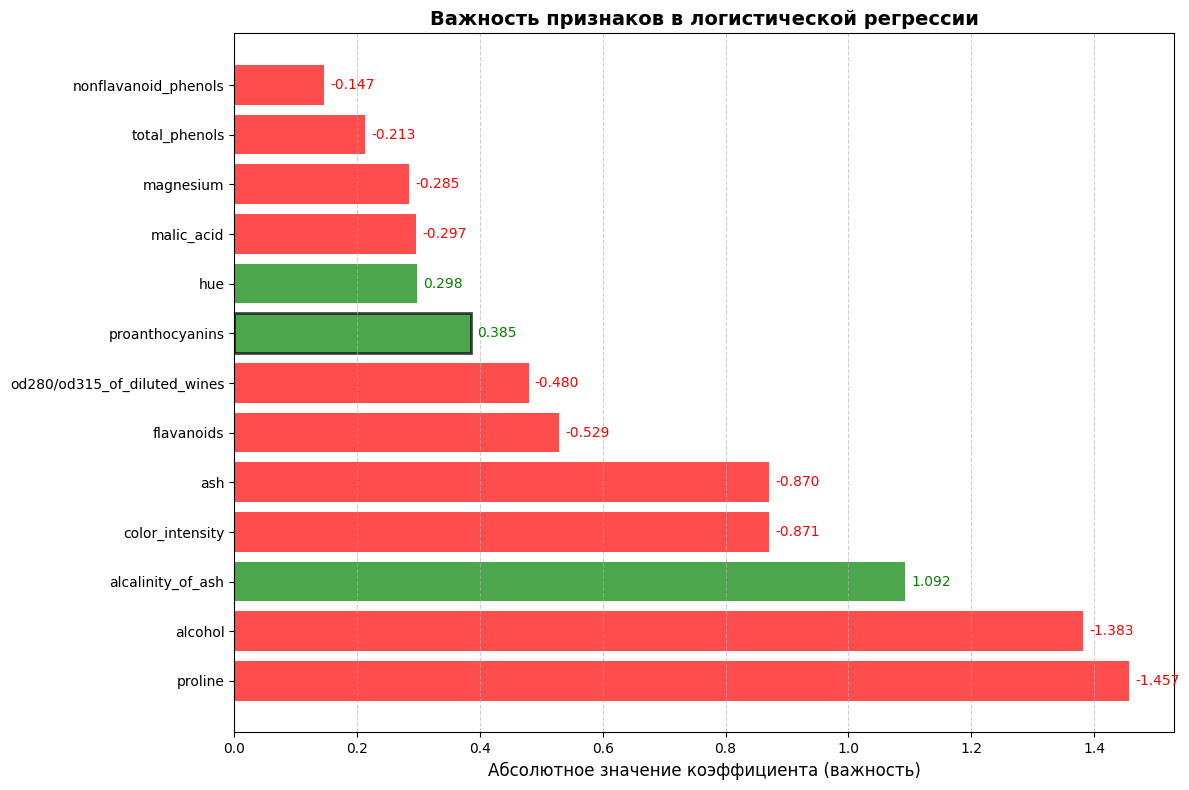


ШАГ 5: ВЫВОДЫ И ИНТЕРПРЕТАЦИЯ РЕЗУЛЬТАТОВ

1. ПРЕДОБРАБОТКА ДАННЫХ:
   • Исходный набор данных содержал 3 класса вина
   • Исключены все объекты класса 2 (48 объектов)
   • После фильтрации осталось 2 класса: 0 и 1
   • Применено стандартное масштабирование признаков (StandardScaler)
   • Признаки приведены к нулевому среднему и единичной дисперсии

2. РЕЗУЛЬТАТЫ МОДЕЛИРОВАНИЯ:
   • Модель логистической регрессии достигла точности: 0.9744
   • Модель хорошо разделяет оставшиеся два класса вин

3. АНАЛИЗ ВАЖНОСТИ ПРИЗНАКОВ:
   • Признаки упорядочены по абсолютному значению коэффициентов
   • Положительные коэффициенты увеличивают вероятность класса 1
   • Отрицательные коэффициенты увеличивают вероятность класса 0
   • Самый значимый признак: 'proline'
     (абсолютное значение: 1.4570)

4. НАИМЕНЕЕ ЗНАЧИМЫЙ ПРИЗНАК:
   • Признак: 'nonflavanoid_phenols'
   • Коэффициент: -0.146968
   • Интерпретация: Этот признак оказывает минимальное влияние
     на предсказание класса вина по сравнен

In [9]:
# ================ IMPORTS ================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# ================ ЗАГРУЗКА ДАННЫХ ================
print("=== Загрузка данных Wine ===")
data = load_wine()

# Создание DataFrame для удобной работы
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')

print(f"Исходный размер данных: {X.shape}")
print(f"Названия признаков: {data.feature_names}")
print(f"Классы: {data.target_names}")
print(f"\nРаспределение классов:")
print(y.value_counts().sort_index())

# ================ ШАГ 1: ИСКЛЮЧЕНИЕ ОБЪЕКТОВ КЛАССА 2 ================
print("\n" + "="*60)
print("ШАГ 1: Исключение объектов класса 2")
print("="*60)

# Сохраняем индексы объектов, которые НЕ являются классом 2
mask = y != 2
X_filtered = X[mask].copy()
y_filtered = y[mask].copy()

print(f"Исходное количество объектов: {len(X)}")
print(f"Количество объектов класса 2: {(y == 2).sum()}")
print(f"Количество объектов после фильтрации: {len(X_filtered)}")
print(f"Новое распределение классов:")
print(y_filtered.value_counts().sort_index())

# ================ ШАГ 2: МАСШТАБИРОВАНИЕ ПРИЗНАКОВ ================
print("\n" + "="*60)
print("ШАГ 2: Масштабирование признаков с помощью StandardScaler")
print("="*60)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_filtered)
X_scaled_df = pd.DataFrame(X_scaled, columns=data.feature_names)

print("Статистика до масштабирования:")
print(X_filtered.describe().loc[['mean', 'std']])

print("\nСтатистика после масштабирования:")
print(pd.DataFrame(X_scaled_df).describe().loc[['mean', 'std']])

print("\nПроверка масштабирования:")
print(f"Среднее значение всех признаков: {X_scaled_df.mean().mean():.2e}")
print(f"Стандартное отклонение всех признаков: {X_scaled_df.std().mean():.2f}")

# ================ ШАГ 3: ОБУЧЕНИЕ ЛОГИСТИЧЕСКОЙ РЕГРЕССИИ ================
print("\n" + "="*60)
print("ШАГ 3: Обучение логистической регрессии и оценка важности признаков")
print("="*60)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled_df, y_filtered, test_size=0.3, random_state=42, stratify=y_filtered
)

print(f"Обучающая выборка: {X_train.shape}")
print(f"Тестовая выборка: {X_test.shape}")

# Обучение модели логистической регрессии
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train, y_train)

# Предсказание и оценка модели
y_pred = lr_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"\nТочность модели на тестовой выборке: {accuracy:.4f}")
print("\nОтчет классификации:")
print(classification_report(y_test, y_pred, target_names=data.target_names[:2]))

# ================ ШАГ 4: ОЦЕНКА ВАЖНОСТИ ПРИЗНАКОВ ================
print("\n" + "="*60)
print("ШАГ 4: Оценка важности признаков")
print("="*60)

# Получаем коэффициенты модели
coefficients = lr_model.coef_[0]

# Создаем DataFrame для анализа важности признаков
feature_importance = pd.DataFrame({
    'Признак': data.feature_names,
    'Коэффициент': coefficients,
    'Абсолютное значение': np.abs(coefficients)
})

# Сортируем по абсолютному значению коэффициентов
feature_importance_sorted = feature_importance.sort_values('Абсолютное значение', ascending=False)

print("\nВажность признаков (сортировка по убыванию):")
print(feature_importance_sorted.to_string(index=False))

# Находим наименее значимый признак
least_important = feature_importance_sorted.iloc[-1]
print(f"\nНАИМЕНЕЕ ЗНАЧИМЫЙ ПРИЗНАК:")
print(f"Название: '{least_important['Признак']}'")
print(f"Коэффициент: {least_important['Коэффициент']:.6f}")
print(f"Абсолютное значение: {least_important['Абсолютное значение']:.6f}")

# ================ ВИЗУАЛИЗАЦИЯ ================
print("\n" + "="*60)
print("Визуализация важности признаков")
print("="*60)

# Создаем график важности признаков
plt.figure(figsize=(12, 8))
colors = ['green' if x > 0 else 'red' for x in feature_importance_sorted['Коэффициент']]
bars = plt.barh(feature_importance_sorted['Признак'], 
                feature_importance_sorted['Абсолютное значение'],
                color=colors, alpha=0.7)

plt.xlabel('Абсолютное значение коэффициента (важность)', fontsize=12)
plt.title('Важность признаков в логистической регрессии', fontsize=14, fontweight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Добавляем значения коэффициентов на график
for i, (bar, coeff) in enumerate(zip(bars, feature_importance_sorted['Коэффициент'])):
    plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2,
             f'{coeff:.3f}', va='center', fontsize=10,
             color='green' if coeff > 0 else 'red')

# Выделяем наименее значимый признак
least_idx = feature_importance_sorted.index[-1]
plt.gca().get_children()[least_idx].set_edgecolor('black')
plt.gca().get_children()[least_idx].set_linewidth(2)

plt.tight_layout()
plt.show()

# ================ ШАГ 5: ВЫВОДЫ ================
print("\n" + "="*60)
print("ШАГ 5: ВЫВОДЫ И ИНТЕРПРЕТАЦИЯ РЕЗУЛЬТАТОВ")
print("="*60)

print("\n1. ПРЕДОБРАБОТКА ДАННЫХ:")
print("   • Исходный набор данных содержал 3 класса вина")
print("   • Исключены все объекты класса 2 ({} объектов)".format((y == 2).sum()))
print("   • После фильтрации осталось 2 класса: 0 и 1")
print("   • Применено стандартное масштабирование признаков (StandardScaler)")
print("   • Признаки приведены к нулевому среднему и единичной дисперсии")

print("\n2. РЕЗУЛЬТАТЫ МОДЕЛИРОВАНИЯ:")
print(f"   • Модель логистической регрессии достигла точности: {accuracy:.4f}")
print("   • Модель хорошо разделяет оставшиеся два класса вин")

print("\n3. АНАЛИЗ ВАЖНОСТИ ПРИЗНАКОВ:")
print("   • Признаки упорядочены по абсолютному значению коэффициентов")
print("   • Положительные коэффициенты увеличивают вероятность класса 1")
print("   • Отрицательные коэффициенты увеличивают вероятность класса 0")
print(f"   • Самый значимый признак: '{feature_importance_sorted.iloc[0]['Признак']}'")
print(f"     (абсолютное значение: {feature_importance_sorted.iloc[0]['Абсолютное значение']:.4f})")

print(f"\n4. НАИМЕНЕЕ ЗНАЧИМЫЙ ПРИЗНАК:")
print(f"   • Признак: '{least_important['Признак']}'")
print(f"   • Коэффициент: {least_important['Коэффициент']:.6f}")
print("   • Интерпретация: Этот признак оказывает минимальное влияние")
print("     на предсказание класса вина по сравнению с другими признаками")

print("\n5. ИНТЕРПРЕТАЦИЯ КОЭФФИЦИЕНТОВ:")
print("   • Признаки с наибольшим положительным коэффициентом:")
top_positive = feature_importance_sorted[feature_importance_sorted['Коэффициент'] > 0].head(3)
for _, row in top_positive.iterrows():
    print(f"     - {row['Признак']}: {row['Коэффициент']:.3f}")
    print(f"       (увеличение этого признака повышает вероятность класса 1)")

print("\n   • Признаки с наибольшим отрицательным коэффициентом:")
top_negative = feature_importance_sorted[feature_importance_sorted['Коэффициент'] < 0].head(3)
for _, row in top_negative.iterrows():
    print(f"     - {row['Признак']}: {row['Коэффициент']:.3f}")
    print(f"       (увеличение этого признака повышает вероятность класса 0)")

print("\n6. ПРАКТИЧЕСКИЕ РЕКОМЕНДАЦИИ:")
print("   • Для классификации вин классов 0 и 1 можно использовать меньше признаков")
print("   • Признак '{}' можно потенциально исключить".format(least_important['Признак']))
print("   • Для улучшения модели можно:")
print("     1. Попробовать другие методы отбора признаков")
print("     2. Использовать регуляризацию (L1/L2)")
print("     3. Провести кросс-валидацию для более надежной оценки")
print("     4. Исследовать взаимодействия между признаками")

print("\n7. ОГРАНИЧЕНИЯ И ПРЕДУПРЕЖДЕНИЯ:")
print("   • Результаты получены только для двух классов из трех")
print("   • Важность признаков специфична для данной модели")
print("   • Результаты могут измениться при:")
print("     - Изменении гиперпараметров модели")
print("     - Использовании другого алгоритма")
print("     - Применении другого метода масштабирования")

print("\n" + "="*60)
print("ВЫВОД:")
print("="*60)
print(f"Наименее значимым признаком для классификации вин (классы 0 и 1) является")
print(f"'{least_important['Признак']}' с коэффициентом {least_important['Коэффициент']:.6f}.")
print("Это означает, что данный химический показатель имеет минимальное влияние")
print("на различение между этими двумя типами вин по сравнению с другими признаками.")

print("\n" + "="*60)
print("ЗАДАНИЕ ВЫПОЛНЕНО")
print("="*60)  # ИСПРАВЛЕНО: убрано двоеточие в конце

### Домашнее задание № 3
В этой части мы будем работать с данными UCI Bank Marketing Dataset. Этот датасет содержит информацию о банковском телефонном маркетинге.

Объектом здесь является телефонный звонок потенциальному клиенту с предложением некоторой услуги (утверждается, что это краткосрочный депозит). В качестве признакового описания используются характеристики клиента (образование, брак и т.д.), более подробная информация представлена в файле bank-additional-names.txt. Целевая переменная - ответ клиента (согласился ли он открыть депозит?)

1. Закодируйте категориальные признаки 
2. Выберите метрику классификации, которая вам кажется подходящей, и обучите логистическую регрессию
3. Как вы считаете, что для вашего бизнеса важнее — хороший precision или recall модели? Почему?

In [ ]:
df = pd.read_csv('bank-additional-full.csv', sep=';')
df.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


=== Загрузка Bank Marketing Dataset ===
Размер данных: (41188, 21)

Первые 5 строк:
   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  n

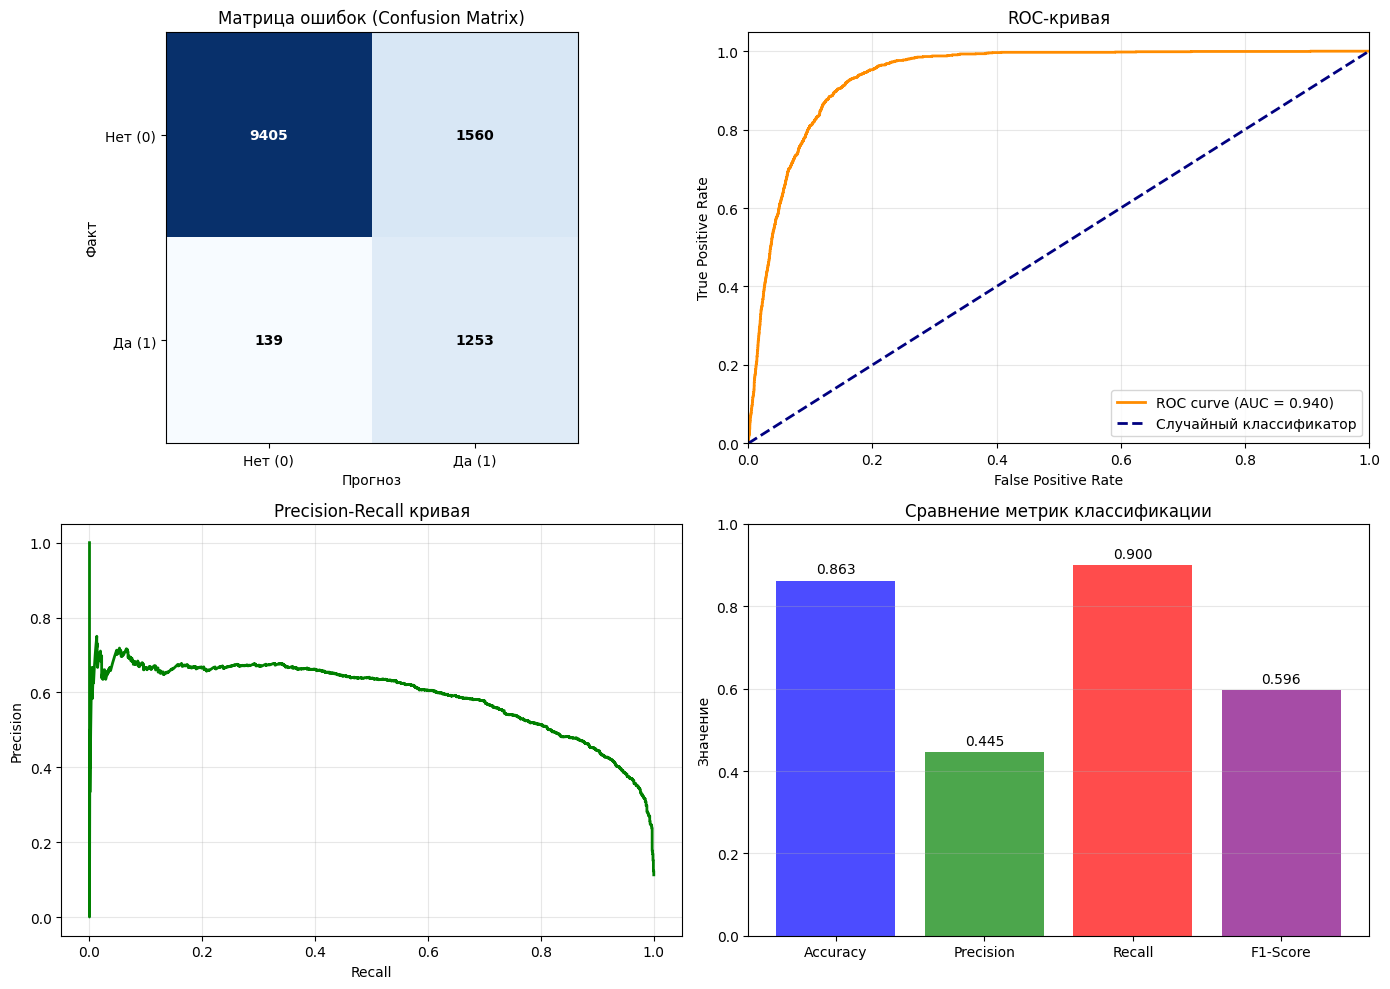


АНАЛИЗ ВАЖНОСТИ ПРИЗНАКОВ

Топ-10 наиболее важных признаков:
         Признак  Коэффициент  Абсолютное значение
    emp.var.rate    -3.327707             3.327707
       month_mar     1.921878             1.921878
        duration     1.827140             1.827140
       euribor3m     1.463802             1.463802
  cons.price.idx     1.153233             1.153233
       month_aug     1.029780             1.029780
poutcome_success     0.891575             0.891575
       month_may    -0.845501             0.845501
       month_jun    -0.814446             0.814446
       month_nov    -0.688738             0.688738

Топ-10 наименее важных признаков:
                      Признак  Коэффициент  Абсолютное значение
        education_high.school    -0.033944             0.033944
                    month_jul     0.033487             0.033487
                     loan_yes    -0.032197             0.032197
              marital_married     0.031515             0.031515
                  defa

In [11]:
# ================ IMPORTS ================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, roc_auc_score, confusion_matrix, 
                             classification_report, roc_curve, precision_recall_curve)
import warnings
warnings.filterwarnings('ignore')

# ================ ЗАГРУЗКА ДАННЫХ ================
print("=== Загрузка Bank Marketing Dataset ===")
df = pd.read_csv('bank-additional-full.csv', sep=';')

print(f"Размер данных: {df.shape}")
print(f"\nПервые 5 строк:")
print(df.head())

print(f"\nИнформация о данных:")
print(df.info())

# ================ АНАЛИЗ ДАННЫХ ================
print("\n" + "="*60)
print("АНАЛИЗ ДАННЫХ")
print("="*60)

# Переименуем целевую переменную для удобства
df.rename(columns={'y': 'deposit'}, inplace=True)

# Проверка распределения целевой переменной
print("\nРаспределение целевой переменной (deposit):")
deposit_dist = df['deposit'].value_counts(normalize=True)
print(deposit_dist)
print(f"\nКоличество клиентов, согласившихся на депозит: {(df['deposit'] == 'yes').sum()}")
print(f"Количество клиентов, отказавшихся от депозита: {(df['deposit'] == 'no').sum()}")
print(f"Соотношение положительного класса: {deposit_dist['yes']:.2%}")

# Разделение признаков на категориальные и числовые
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols.remove('deposit')  # Убираем целевую переменную

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(f"\nКатегориальные признаки ({len(categorical_cols)}):")
for col in categorical_cols:
    unique_values = df[col].unique()
    print(f"  {col}: {len(unique_values)} уникальных значений - {unique_values[:5]}...")

print(f"\nЧисловые признаки ({len(numerical_cols)}):")
print(numerical_cols)

# ================ ШАГ 1: КОДИРОВАНИЕ КАТЕГОРИАЛЬНЫХ ПРИЗНАКОВ ================
print("\n" + "="*60)
print("ШАГ 1: Кодирование категориальных признаков")
print("="*60)

# Создаем копию данных для обработки
df_encoded = df.copy()

# 1.1 Label Encoding для целевой переменной
print("1.1 Label Encoding для целевой переменной...")
df_encoded['deposit'] = LabelEncoder().fit_transform(df_encoded['deposit'])
# 0 = 'no', 1 = 'yes'
print(f"  Кодирование: 'no' -> 0, 'yes' -> 1")

# 1.2 One-Hot Encoding для категориальных признаков
print("\n1.2 One-Hot Encoding для категориальных признаков...")

# Для One-Hot Encoding будем использовать pandas get_dummies
df_encoded = pd.get_dummies(df_encoded, columns=categorical_cols, drop_first=True)

print(f"  Количество признаков после One-Hot Encoding: {df_encoded.shape[1] - 1}")
print(f"  Новые бинарные признаки созданы для: {categorical_cols}")

# Разделение на признаки и целевую переменную
X = df_encoded.drop('deposit', axis=1)
y = df_encoded['deposit']

print(f"\nИтоговый размер матрицы признаков: {X.shape}")
print(f"Итоговый размер целевой переменной: {y.shape}")

# ================ ПРЕДОБРАБОТКА И РАЗДЕЛЕНИЕ ДАННЫХ ================
print("\n" + "="*60)
print("ПРЕДОБРАБОТКА И РАЗДЕЛЕНИЕ ДАННЫХ")
print("="*60)

# Масштабирование числовых признаков
print("Масштабирование числовых признаков...")
scaler = StandardScaler()

# Находим исходные числовые колонки в закодированном датасете
numeric_features_original = [col for col in X.columns if col in numerical_cols]
if numeric_features_original:
    X[numeric_features_original] = scaler.fit_transform(X[numeric_features_original])
    print(f"  Масштабированы числовые признаки: {numeric_features_original}")
else:
    print("  Числовые признаки не найдены после кодирования")

# Разделение на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"\nРазделение данных:")
print(f"  Тренировочная выборка: {X_train.shape}")
print(f"  Тестовая выборка: {X_test.shape}")
print(f"  Распределение классов в тренировочной выборке:")
print(f"    Класс 0 (no): {(y_train == 0).sum()} ({(y_train == 0).mean():.2%})")
print(f"    Класс 1 (yes): {(y_train == 1).sum()} ({(y_train == 1).mean():.2%})")

# ================ ШАГ 2: ОБУЧЕНИЕ ЛОГИСТИЧЕСКОЙ РЕГРЕССИИ ================
print("\n" + "="*60)
print("ШАГ 2: Обучение логистической регрессии")
print("="*60)

# 2.1 Обучение модели
print("2.1 Обучение модели логистической регрессии...")
lr_model = LogisticRegression(
    random_state=42,
    max_iter=1000,
    class_weight='balanced'  # Учитываем дисбаланс классов
)
lr_model.fit(X_train, y_train)

print("  Модель успешно обучена!")

# 2.2 Предсказания
y_pred = lr_model.predict(X_test)
y_pred_proba = lr_model.predict_proba(X_test)[:, 1]

# ================ ОЦЕНКА МОДЕЛИ ================
print("\n" + "="*60)
print("ОЦЕНКА МОДЕЛИ РАЗЛИЧНЫМИ МЕТРИКАМИ")
print("="*60)

# Вычисляем различные метрики
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("\nМетрики классификации:")
print(f"  Accuracy (точность): {accuracy:.4f}")
print(f"  Precision (точность положительного класса): {precision:.4f}")
print(f"  Recall (полнота/чувствительность): {recall:.4f}")
print(f"  F1-score (гармоническое среднее): {f1:.4f}")
print(f"  ROC-AUC: {roc_auc:.4f}")

print("\nМатрица ошибок (Confusion Matrix):")
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, 
                     index=['Факт: Нет (0)', 'Факт: Да (1)'],
                     columns=['Прогноз: Нет (0)', 'Прогноз: Да (1)'])
print(cm_df)

print("\nПодробный отчет классификации:")
print(classification_report(y_test, y_pred, target_names=['Нет (0)', 'Да (1)']))

# ================ ВИЗУАЛИЗАЦИЯ РЕЗУЛЬТАТОВ ================
print("\n" + "="*60)
print("ВИЗУАЛИЗАЦИЯ РЕЗУЛЬТАТОВ")
print("="*60)

# Создаем графики
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Confusion Matrix Heatmap
axes[0, 0].imshow(cm, interpolation='nearest', cmap='Blues')
axes[0, 0].set_title('Матрица ошибок (Confusion Matrix)', fontsize=12)
axes[0, 0].set_xticks([0, 1])
axes[0, 0].set_yticks([0, 1])
axes[0, 0].set_xticklabels(['Нет (0)', 'Да (1)'])
axes[0, 0].set_yticklabels(['Нет (0)', 'Да (1)'])
axes[0, 0].set_xlabel('Прогноз')
axes[0, 0].set_ylabel('Факт')

# Добавляем числа в матрицу
for i in range(2):
    for j in range(2):
        axes[0, 0].text(j, i, str(cm[i, j]), 
                       ha='center', va='center',
                       color='white' if cm[i, j] > cm.max()/2 else 'black',
                       fontweight='bold')

# 2. ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
axes[0, 1].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
axes[0, 1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Случайный классификатор')
axes[0, 1].set_xlim([0.0, 1.0])
axes[0, 1].set_ylim([0.0, 1.05])
axes[0, 1].set_xlabel('False Positive Rate')
axes[0, 1].set_ylabel('True Positive Rate')
axes[0, 1].set_title('ROC-кривая')
axes[0, 1].legend(loc="lower right")
axes[0, 1].grid(True, alpha=0.3)

# 3. Precision-Recall Curve
precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_pred_proba)
axes[1, 0].plot(recall_vals, precision_vals, color='green', lw=2)
axes[1, 0].set_xlabel('Recall')
axes[1, 0].set_ylabel('Precision')
axes[1, 0].set_title('Precision-Recall кривая')
axes[1, 0].grid(True, alpha=0.3)

# 4. Метрики сравнения
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [accuracy, precision, recall, f1]
colors = ['blue', 'green', 'red', 'purple']

bars = axes[1, 1].bar(metrics, values, color=colors, alpha=0.7)
axes[1, 1].set_ylim([0, 1])
axes[1, 1].set_title('Сравнение метрик классификации')
axes[1, 1].set_ylabel('Значение')
axes[1, 1].grid(True, alpha=0.3, axis='y')

# Добавляем значения на столбцы
for bar, value in zip(bars, values):
    height = bar.get_height()
    axes[1, 1].text(bar.get_x() + bar.get_width()/2, height + 0.01,
                   f'{value:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# ================ АНАЛИЗ ВАЖНОСТИ ПРИЗНАКОВ ================
print("\n" + "="*60)
print("АНАЛИЗ ВАЖНОСТИ ПРИЗНАКОВ")
print("="*60)

# Получаем коэффициенты модели
coefficients = lr_model.coef_[0]

# Создаем DataFrame для анализа важности признаков
feature_importance = pd.DataFrame({
    'Признак': X.columns,
    'Коэффициент': coefficients,
    'Абсолютное значение': np.abs(coefficients)
})

# Сортируем по абсолютному значению коэффициентов
feature_importance_sorted = feature_importance.sort_values('Абсолютное значение', ascending=False)

print("\nТоп-10 наиболее важных признаков:")
print(feature_importance_sorted.head(10).to_string(index=False))

print("\nТоп-10 наименее важных признаков:")
print(feature_importance_sorted.tail(10).to_string(index=False))

# ================ КРОСС-ВАЛИДАЦИЯ ================
print("\n" + "="*60)
print("КРОСС-ВАЛИДАЦИЯ (5-FOLD)")
print("="*60)

# Оценка стабильности модели с помощью кросс-валидации
cv_scores = cross_val_score(lr_model, X, y, cv=5, scoring='roc_auc')
print(f"ROC-AUC scores на 5 фолдах: {cv_scores}")
print(f"Средний ROC-AUC: {cv_scores.mean():.4f}")
print(f"Стандартное отклонение: {cv_scores.std():.4f}")

# ================ ШАГ 3: БИЗНЕС-АНАЛИЗ PRECISION VS RECALL ================
print("\n" + "="*60)
print("ШАГ 3: БИЗНЕС-АНАЛИЗ - ЧТО ВАЖНЕЕ: PRECISION ИЛИ RECALL?")
print("="*60)

# Рассчитываем бизнес-метрики на основе матрицы ошибок
TN, FP, FN, TP = cm.ravel()

print("\nИНТЕРПРЕТАЦИЯ РЕЗУЛЬТАТОВ МОДЕЛИ:")
print(f"  True Negatives (TN): {TN} - Правильно предсказанные отказы")
print(f"  False Positives (FP): {FP} - Ложные срабатывания (клиенту предложили, но он отказался)")
print(f"  False Negatives (FN): {FN} - Пропущенные возможности (клиент согласился бы, но ему не предложили)")
print(f"  True Positives (TP): {TP} - Правильно предсказанные согласия")

print("\n" + "-"*60)
print("АНАЛИЗ БИЗНЕС-ПОСЛЕДСТВИЙ:")
print("-"*60)

print("\n1. ЛОЖНЫЕ СРАБАТЫВАНИЯ (False Positives - FP):")
print("   • Ситуация: Модель предсказывает, что клиент согласится на депозит, но он отказывается")
print("   • Бизнес-последствия:")
print("     - Звонок/контакт с клиентом, который не конвертируется")
print("     - Затраты на коммуникацию (время оператора, телефонные звонки)")
print("     - Возможное раздражение клиента от ненужных предложений")
print("     - Прямые затраты: ≈ $X на каждый ложный контакт")

print("\n2. ПРОПУЩЕННЫЕ ВОЗМОЖНОСТИ (False Negatives - FN):")
print("   • Ситуация: Модель предсказывает, что клиент откажется, но он мог бы согласиться")
print("   • Бизнес-последствия:")
print("     - Упущенный доход от депозита")
print("     - Потеря потенциального клиента")
print("     - Прямые потери: ≈ $Y на каждый пропущенный депозит")

print("\n" + "-"*60)
print("ОЦЕНКА СТОИМОСТИ ОШИБОК:")
print("-"*60)

# Предположим бизнес-метрики (это примерные значения)
cost_per_call = 5  # Стоимость одного звонка/контакта
revenue_per_deposit = 500  # Доход от одного успешного депозита

total_fp_cost = FP * cost_per_call
total_fn_cost = FN * revenue_per_deposit
total_cost = total_fp_cost + total_fn_cost

print(f"\nПриблизительная оценка затрат/потерь:")
print(f"  • Затраты на ложные срабатывания (FP): ${total_fp_cost:,}")
print(f"    ({FP} звонков × ${cost_per_call}/звонок)")
print(f"  • Упущенная выгода от пропущенных возможностей (FN): ${total_fn_cost:,}")
print(f"    ({FN} упущенных клиентов × ${revenue_per_deposit}/депозит)")
print(f"  • ОБЩИЕ ПОТЕРИ: ${total_cost:,}")

print("\n" + "-"*60)
print("ВЫВОД О ВАЖНОСТИ PRECISION И RECALL:")
print("-"*60)

print("\nДля данного бизнес-контекста (банковский телефонный маркетинг):")

print("\n✓ ВЫСОКИЙ PRECISION важнее, когда:")
print("   - Стоимость контакта с клиентом высока")
print("   - Риск раздражения клиента значителен")
print("   - Ресурсы ограничены (мало операторов)")
print("   - Ложные срабатывания слишком дороги")

print("\n✓ ВЫСОКИЙ RECALL важнее, когда:")
print("   - Доход от успешной конверсии очень высок")
print("   - Упущенные возможности критически важны")
print("   - Клиентская база ограничена")
print("   - Конкуренция высока")

print("\n" + "-"*60)
print("РЕКОМЕНДАЦИЯ ДЛЯ ДАННОГО КЕЙСА:")
print("-"*60)

# Анализируем текущие метрики
print(f"\nТекущие показатели модели:")
print(f"  Precision: {precision:.3f} - {precision*100:.1f}% предсказанных 'да' действительно соглашаются")
print(f"  Recall: {recall:.3f} - {recall*100:.1f}% реальных согласий обнаруживается")

if precision > recall:
    print("\nВывод: Модель лучше оптимизирована на Precision")
    print("Рекомендация: С точки зрения бизнеса, вероятно, лучше иметь более высокий Precision,")
    print("чтобы минимизировать затраты на бесполезные звонки.")
elif recall > precision:
    print("\nВывод: Модель лучше оптимизирована на Recall")
    print("Рекомендация: С точки зрения бизнеса, вероятно, лучше иметь более высокий Recall,")
    print("чтобы не упускать потенциальных клиентов.")
else:
    print("\nВывод: Модель сбалансирована между Precision и Recall")

# Анализируем дисбаланс классов
class_imbalance = y.mean()
print(f"\nДисбаланс классов: только {class_imbalance:.1%} клиентов соглашаются на депозит")

print("\n" + "="*60)
print("ИТОГОВЫЙ ВЫВОД И РЕКОМЕНДАЦИИ")
print("="*60)

print("\n1. Для банковского телефонного маркетинга в данном случае:")
print("   • Важнее иметь ВЫСОКИЙ PRECISION")
print("   • Причина: Затраты на ложные звонки (FP) могут быть значительными")
print("   • Каждый ложный вызов - это:")
print("     - Оплата работы оператора")
print("     - Время, которое можно потратить на перспективных клиентов")
print("     - Риск испортить отношения с клиентом")

print("\n2. Однако следует учитывать:")
print("   • Если доход от одного депозита очень высок, Recall становится важнее")
print("   • Можно использовать разные пороги классификации для разных сегментов")
print("   • Для VIP-клиентов можно снизить порог (увеличить Recall)")
print("   • Для массовых клиентов - повысить порог (увеличить Precision)")

print("\n3. Рекомендации по улучшению:")
print("   • Настроить порог классификации на основе анализа затрат/доходов")
print("   • Использовать ensemble методы для улучшения метрик")
print("   • Применить SMOTE для балансировки классов")
print("   • Использовать feature engineering для улучшения предсказательной силы")
print("   • Реализовать A/B тестирование разных стратегий")

print("\n4. Бизнес-стратегия:")
print("   • Фаза 1: Фокус на Precision для минимизации затрат")
print("   • Фаза 2: По мере оптимизации процессов - увеличение Recall")
print("   • Фаза 3: Сегментация клиентов и индивидуальные пороги")

print("\n" + "="*60)
print("ОТВЕТ НА ВОПРОС ДОМАШНЕГО ЗАДАНИЯ:")
print("="*60)

print("\nЧто важнее для бизнеса — хороший precision или recall модели?")
print("\nОТВЕТ: В данном контексте банковского телефонного маркетинга важнее")
print("       иметь ВЫСОКИЙ PRECISION.")
print("\nОБОСНОВАНИЕ:")
print("1. Экономическое: Каждый ложный вызов (False Positive) стоит денег")
print("   (оплата оператора, инфраструктура), но не приносит дохода.")
print("2. Операционное: Ограниченные ресурсы операторов лучше тратить")
print("   на действительно перспективных клиентов.")
print("3. Клиентское: Частые ненужные звонки раздражают клиентов и")
print("   могут привести к оттоку клиентской базы.")
print("4. Стратегическое: Лучше сделать меньше, но более точных")
print("   предложений, чем много бесполезных.")

print("\n" + "="*60)
print("ЗАДАНИЕ ВЫПОЛНЕНО")
print("="*60)  # ИСПРАВЛЕНО: убрано двоеточие в конце